# LeNet_1025_same_pic_train_1000


# import部分

In [32]:
%matplotlib inline
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [33]:
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# 每個 MNIST 中的圖片都有一個對應的 label 也就是從 0 到 9 的數值．
# 在這裡每個 label 都是一個 one-hot vectors
# one-hot vector 是指法就是 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


# 觀察資料型態


In [34]:
print ("讓我們看一下 MNIST 訓練還有測試的資料集長得如何")
#print ("mnist資料型態 : %s " %(type(mnist)))
print ("mnist資料型態 : " + str(type(mnist)))
print ("training sample 共有 %s 個"%(mnist.train.num_examples))
print ("validation sample 共有 %s 個" %(mnist.validation.num_examples))
print ("testing sample 共有 %s 個"  %(mnist.test.num_examples))
train_img = mnist.train.images
train_label = mnist.train.labels
test_img = mnist.test.images
test_label = mnist.test.labels
print("train_img 的 type : %s" % (type(train_img)))
print("train_img 的 dimension : %s" % (train_img.shape,))
print("train_label 的 type : %s" % (type(train_label)))
print("train_label 的 dimension : %s" % (train_label.shape,))
print("test_img 的 type : %s" % (type(test_img)))
print("test_img 的 dimension : %s" % (test_img.shape,))
print("test_label 的 type : %s" % (type(test_label)))
print("test_label 的 dimension : %s" % (test_label.shape,))

讓我們看一下 MNIST 訓練還有測試的資料集長得如何
mnist資料型態 : <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
training sample 共有 55000 個
validation sample 共有 5000 個
testing sample 共有 10000 個
train_img 的 type : <class 'numpy.ndarray'>
train_img 的 dimension : (55000, 784)
train_label 的 type : <class 'numpy.ndarray'>
train_label 的 dimension : (55000, 10)
test_img 的 type : <class 'numpy.ndarray'>
test_img 的 dimension : (10000, 784)
test_label 的 type : <class 'numpy.ndarray'>
test_label 的 dimension : (10000, 10)


# 自定義函數(印出用)

In [35]:
def reshape_pic(origin, size, channel, xsnum):
    pic = origin[xsnum] #第num張照片 
    ch = pic.transpose(2,0,1).reshape([channel,-1]) #將照片拉成數個channel
    out = ch.reshape([size*channel,size]) #將第cnum的channel照片拉成28x28
#     print("\n*********************************************************************************\n")    
#     print ("pic shape:" + str(pic.shape))
#     print ("ch shape:" + str(ch.shape))
    print ("output shape:" + str(out.shape))
#     print("\n*********************************************************************************\n")
    return out


In [36]:
 def print_pic_int(x):
    print("\n*********************************************************************************\n")

    j = 0
    while j < (x.shape[0]) :
        print (str(int(round(x[j,0])))+ " "+ str(int(round(x[j,1])))
            + " "+ str(int(round(x[j,2])))+ " "+ str(int(round(x[j,3])))
            + " "+ str(int(round(x[j,4])))+ " "+ str(int(round(x[j,5])))
            + " "+ str(int(round(x[j,6])))+ " "+ str(int(round(x[j,7])))
            + " "+ str(int(round(x[j,8])))+ " "+ str(int(round(x[j,9])))
            + " "+ str(int(round(x[j,10])))+ " "+ str(int(round(x[j,11])))
            + " "+ str(int(round(x[j,12])))+ " "+ str(int(round(x[j,13])))
            + " "+ str(int(round(x[j,14])))+ " "+ str(int(round(x[j,15])))
            + " "+ str(int(round(x[j,16])))+ " "+ str(int(round(x[j,17])))
            + " "+ str(int(round(x[j,18])))+ " "+ str(int(round(x[j,19])))
            + " "+ str(int(round(x[j,20])))+ " "+ str(int(round(x[j,21])))
            + " "+ str(int(round(x[j,22])))+ " "+ str(int(round(x[j,23])))
            + " "+ str(int(round(x[j,24])))+ " "+ str(int(round(x[j,25])))
            + " "+ str(int(round(x[j,26])))+ " "+ str(int(round(x[j,27]))))
        j += 1    
        if(j% (x.shape[1]) == 0):
            print("\n*********************************************************************************\n")
        

In [37]:
def print_pic_prec(x , prec):
    print ("test printing by num:")
    i = 0
    print("\n*********************************************************************************\n")
    
    while i < (x.shape[0]) :
        print  (str(round(x[i,0], prec))+ "\t"+ str(round(x[i,1], prec))
            + "\t"+ str(round(x[i,2], prec))+ "\t"+ str(round(x[i,3], prec))
            + "\t"+ str(round(x[i,4], prec))+ "\t"+ str(round(x[i,5], prec))
            + "\t"+ str(round(x[i,6], prec))+ "\t"+ str(round(x[i,7], prec))
            + "\t"+ str(round(x[i,8], prec))+ "\t"+ str(round(x[i,9], prec))
            + "\t"+ str(round(x[i,10], prec))+ "\t"+ str(round(x[i,11], prec))
            + "\t"+ str(round(x[i,12], prec))+ "\t"+ str(round(x[i,13], prec))
            + "\t"+ str(round(x[i,14], prec))+ "\t"+ str(round(x[i,15], prec))
            + "\t"+ str(round(x[i,16], prec))+ "\t"+ str(round(x[i,17], prec))
            + "\t"+ str(round(x[i,18], prec))+ "\t"+ str(round(x[i,19], prec))
            + "\t"+ str(round(x[i,20], prec))+ "\t"+ str(round(x[i,21], prec))
            + "\t"+ str(round(x[i,22], prec))+ "\t"+ str(round(x[i,23], prec))
            + "\t"+ str(round(x[i,24], prec))+ "\t"+ str(round(x[i,25], prec))
            + "\t"+ str(round(x[i,26], prec))+ "\t"+ str(round(x[i,27], prec)))
        i += 1
        if(i% (x.shape[1]) == 0):
             print("\n*********************************************************************************\n")

# 印出 filter 函數

In [38]:
# print_pic_prec(reshape_pic(W_conv1,5,6,0),2)
def print_filter():
#     print (sess.run(W_conv1[0]).shape)
#     print (sess.run(W_conv1).shape)
    i = 0
    filter_no = 0
    #while filter_no < 5:
    while i < 5:
        print (str(sess.run(W_conv1[0,i,0,filter_no]))+"\t"
        +str(sess.run(W_conv1[1,i,0,filter_no]))+"\t"
        +str(sess.run(W_conv1[2,i,0,filter_no]))+"\t"
        +str(sess.run(W_conv1[3,i,0,filter_no]))+"\t"
        +str(sess.run(W_conv1[4,i,0,filter_no]))+"\t")
        i+=1
   #     filter_no+=1
   #     i=0

# print (sess.run(W_conv1[0], feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5}))

# 印出結果 函數

In [39]:
def print_result():
#     print ("prediction shape : " + str(prediction[0].shape))
#     print("\n*********************************************************************************\n")
    print (sess.run(prediction[0], feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5}))

# 函數定義區

In [40]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1}) #feee_dict 餵字串
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1)) #使用argmax函數
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape,mean=0, stddev=0.1)  #設定weight mean dev
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape) #設定bias
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')


# CNN 訓練過程

In [41]:

# define placeholder for inputs to network
# xs = tf.placeholder(tf.float32, [None, 784]) 
# print (xs)
# print (sess.run(xs))
# xs = tf.placeholder(tf.float32, [None, 784])/255  
# print (xs)
# print (sess.run(xs))
xs = tf.placeholder(tf.float32, [None, 784])/255.  
# print (xs)
# print (sess.run(xs))
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)  # The keep_prob value is used to control the dropout rate used when training the neural network. 
x_image = tf.reshape(xs, [-1, 28, 28, 1]) # 784 -> 28x28
# print(x_image.shape)  # [n_samples, 28,28,1]

## conv1 layer ##
W_conv1 = weight_variable([5,5,1,6]) # patch 5x5, in size 1, out size 6
b_conv1 = bias_variable([6])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 28x28x6
h_pool1 = max_pool_2x2(h_conv1)                                         # output size 14x14x32

## conv2 layer ##
W_conv2 = weight_variable([5,5, 6, 16]) # patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([16])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # output size 14x14x64
h_pool2 = max_pool_2x2(h_conv2)                                         # output size 7x7x64

## fc1 layer ##
W_fc1 = weight_variable([7*7*16, 120])
b_fc1 = bias_variable([120])
# [n_samples, 7, 7, 64] ->> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*16])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## fc2 layer ##
W_fc2 = weight_variable([120, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss 接着呢我们利用交叉熵损失函数来定义我们的cost function
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)  # 我们用tf.train.AdamOptimizer()作为我们的优化器进行优化，使我们的cross_entropy最小

sess = tf.Session() #定义Session
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1: # # tf.initialize_all_variables() 这种写法马上就要被废弃
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()

sess.run(init)


# 決定訓練次數與計算訓練精準度

In [42]:
batch_xs, batch_ys = mnist.train.next_batch(100)

訓練用圖長相：
output shape:(28, 28)


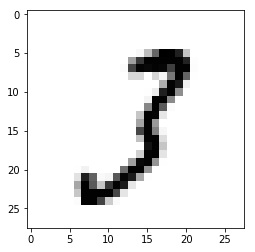

第1次的精確度： 0.097
filter 長相：
-0.0195732	0.0472913	0.00758653	-0.0618246	0.00981256	
-0.0392469	0.0462124	0.0309005	-0.0211285	0.000202019	
-0.122283	0.04022	0.161715	-0.0179683	-0.140985	
0.00764258	-0.0913772	0.0360861	0.047481	0.133404	
0.0375828	0.154224	-0.0311269	-0.0720982	0.150697	
預測結果：
[ 0.20718749  0.06018125  0.09498139  0.09471428  0.0970479   0.03920643
  0.12360535  0.08171302  0.11707676  0.08428612]

*********************************************************************************

第100次的精確度： 0.437
filter 長相：
-0.0205232	0.0487558	0.0138633	-0.0535251	0.0125364	
-0.041901	0.0504017	0.0402411	-0.0120401	0.00493445	
-0.127412	0.0460398	0.17098	-0.00833465	-0.13625	
0.0106637	-0.0852751	0.0441588	0.0540213	0.135129	
0.0423891	0.159546	-0.0258461	-0.0660651	0.156175	
預測結果：
[ 0.07484678  0.14085159  0.10327636  0.08350328  0.05148327  0.14194995
  0.07207392  0.10645395  0.14890373  0.07665709]

*********************************************************************************

第

In [43]:
for i in range(1000):
#     print ("第1張圖的 shape : " + str(x_image.shape))
#     px1 = sess.run(x_image, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
#     plt.imshow(reshape_pic(px1,28,1,0), cmap='Greys')  
#     plt.show()
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})    
#     if(i % 10 == 0):
#         print ("已經訓練完"+str(int(i)+1)+"次")
    if(i == 0):
        print ("訓練用圖長相：")
        px1 = sess.run(x_image, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
        plt.imshow(reshape_pic(px1,28,1,0), cmap='Greys')  
        plt.show()
        print ("第"+str(int(i)+1)+"次的精確度： "+str(compute_accuracy(mnist.test.images[:1000], mnist.test.labels[:1000])))
        print ("filter 長相：")
        print_filter()    
        print ("預測結果：")
        print_result()
        print("\n*********************************************************************************\n")
        train1=sess.run(W_conv1)
    if(i == 99):
        print ("第"+str(int(i)+1)+"次的精確度： "+str(compute_accuracy(mnist.test.images[:1000], mnist.test.labels[:1000])))
        print ("filter 長相：")
        print_filter()
        print ("預測結果：")
        print_result()
        print("\n*********************************************************************************\n")
        train100=sess.run(W_conv1)
    if(i == 999):
        print ("第"+str(int(i)+1)+"次的精確度： "+str(compute_accuracy(mnist.test.images[:1000], mnist.test.labels[:1000])))
        print ("filter 長相：")
        print_filter()
        print ("預測結果：")
        print_result()
        print("\n*********************************************************************************\n")
        train1000=sess.run(W_conv1)
        

# 训练数据，我们假定训练1000步，每50步输出一下准确率， 注意sess.run()时记得要用feed_dict给我们的众多 placeholder 喂数据哦.
# 以上呢就是一个简单的卷积神经网络的例子代码            
# for i in range(1000):
#     batch_xs, batch_ys = mnist.train.next_batch(100)
#     sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
#     if i % 50 == 0:
#         print ("第"+str(int(i/50)+1)+"次的精確度： "+str(compute_accuracy(
#             mnist.test.images[:1000], mnist.test.labels[:1000])))

# filter 相減


In [44]:

train_result = np.subtract(train100,train1)
i = 0
filter_no = 0
print("\n train100 - train1 : \n")
while i < 5:
    print (str(train_result[0,i,0,filter_no])+"\t"
        +str(train_result[1,i,0,filter_no])+"\t"
        +str(train_result[2,i,0,filter_no])+"\t"
        +str(train_result[3,i,0,filter_no])+"\t"
        +str(train_result[4,i,0,filter_no])+"\t")
    i+=1
print("\n*********************************************************************************\n")
    
train_result = np.subtract(train1000,train1)
i = 0
filter_no = 0
print("\n train1000 - train1 : \n")
while i < 5:
    print (str(train_result[0,i,0,filter_no])+"\t"
        +str(train_result[1,i,0,filter_no])+"\t"
        +str(train_result[2,i,0,filter_no])+"\t"
        +str(train_result[3,i,0,filter_no])+"\t"
        +str(train_result[4,i,0,filter_no])+"\t")
    i+=1
print("\n*********************************************************************************\n")    

train_result = np.subtract(train1000,train100)
i = 0
filter_no = 0
print("\n train1000 - train100 : \n")
while i < 5:
    print (str(train_result[0,i,0,filter_no])+"\t"
        +str(train_result[1,i,0,filter_no])+"\t"
        +str(train_result[2,i,0,filter_no])+"\t"
        +str(train_result[3,i,0,filter_no])+"\t"
        +str(train_result[4,i,0,filter_no])+"\t")
    i+=1    
print("\n*********************************************************************************\n")    



 train100 - train1 : 

-0.000949955	0.00146452	0.00627679	0.00829947	0.0027238	
-0.00265418	0.00418929	0.00934055	0.00908841	0.00473243	
-0.00512936	0.00581976	0.00926521	0.00963366	0.00473502	
0.00302109	0.00610212	0.00807267	0.00654027	0.0017252	
0.00480633	0.00532237	0.0052808	0.00603306	0.00547802	

*********************************************************************************


 train1000 - train1 : 

-0.040643	0.0305542	0.0603078	0.041882	-0.00709036	
-0.0570744	0.0449086	0.0614068	0.0448607	0.0121043	
-0.0268832	0.0610031	0.0648935	0.0569172	0.0458085	
0.0392833	0.0608439	0.0636492	0.0618561	0.0571504	
0.0507756	0.0573374	0.0595184	0.061018	0.0587513	

*********************************************************************************


 train1000 - train100 : 

-0.0396931	0.0290897	0.0540311	0.0335825	-0.00981416	
-0.0544202	0.0407193	0.0520662	0.0357723	0.0073719	
-0.0217539	0.0551834	0.0556283	0.0472836	0.0410735	
0.0362622	0.0547417	0.0555766	0.0553158	0.0554252	
0.0459693

# 印出結果---input


第1張圖的 shape : (?, 28, 28, 1)
output shape:(28, 28)


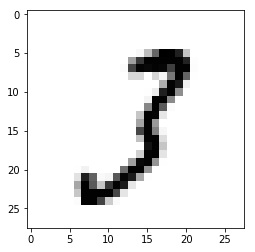

In [45]:
print ("第1張圖的 shape : " + str(x_image.shape))
px1 = sess.run(x_image, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
plt.imshow(reshape_pic(px1,28,1,0), cmap='Greys')  

# print_pic_prec(reshape_pic(px1,28,1,0),5)
# print_pic_int(reshape_pic(px1,28,1,0))

# 印出結果---conv 1層

conv1 shape : (?, 28, 28, 6)
output shape:(168, 28)


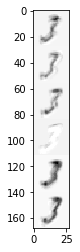

In [46]:
    print ("conv1 shape : " + str(h_conv1.shape))
    pC1 = sess.run(h_conv1, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    plt.imshow(reshape_pic(pC1,28,6,0), cmap='Greys')

#     print_pic_prec(reshape_pic(pC1,28,6,0),3)
#     print_pic_int(reshape_pic(pC1,28,6,0))
    
    # print("\n*********************************************************************************\n")
    # print ("reshape pic shape:" + str((reshape_pic(pC1,28,6,0)).shape))
    # print ("content:\n" + str(reshape_pic(pC1,28,6,0)))
    # print("\n*********************************************************************************\n")

# 印出結果---pool 1層

pool1 shape : (?, 14, 14, 6)
output shape:(84, 14)


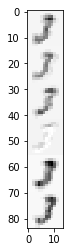

In [47]:
    print ("pool1 shape : " + str(h_pool1.shape))
    pH1 = sess.run(h_pool1, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    plt.imshow(reshape_pic(pH1,14,6,0), cmap='Greys')
    
    #print_pic_prec(reshape_pic(pH1,14,6,0),3)
    #print_pic_int(reshape_pic(pH1,14,6,0))

# 印出結果---conv 2層

conv2 shape : (?, 14, 14, 16)
output shape:(224, 14)


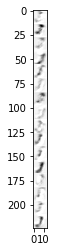

In [48]:
    print ("conv2 shape : " + str(h_conv2.shape))
    pC2 = sess.run(h_conv2, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    plt.imshow(reshape_pic(pC2,14,16,0), cmap='Greys')
    
    #print_pic_prec(reshape_pic(pC2,14,16,0),3)
    #print_pic_int(reshape_pic(pC2,14,16,0))

# 印出結果---pool 2層

pool2 shape : (?, 7, 7, 16)
output shape:(112, 7)


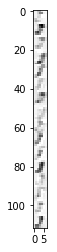

In [49]:
    print ("pool2 shape : " + str(h_pool2.shape))
    pH2 = sess.run(h_pool2, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    plt.imshow(reshape_pic(pH2,7,16,0), cmap='Greys')
    
    #print_pic_prec(reshape_pic(pH2,7,16,0),3)
    #print_pic_int(reshape_pic(pH2,7,16,0))

# 印出結果---fc 1層

In [50]:
    print ("fc1 shape : " + str(h_fc1[0].shape))
    print("\n*********************************************************************************\n")
    print (sess.run(h_fc1[0], feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5}))

fc1 shape : (120,)

*********************************************************************************

[ 4.09653711  0.01963946  1.9758364   2.64005184  0.07451841  0.
  2.17936563  0.          5.07511234  0.          3.69416285  2.45945954
  3.61888242  2.8741796   2.05706525  4.42120361  0.          0.          0.
  0.          0.          1.57208371  0.06176444  0.          0.
  0.18937364  0.          1.89210761  0.77430588  2.49195647  1.42138815
  0.          2.23222947  0.          2.11569023  2.51470304  0.
  0.33618048  0.          1.87438738  0.          4.77603197  0.
  1.28843379  0.08503646  2.18359947  2.2413137   1.48897982  0.          0.
  0.07284534  0.20703779  0.          0.          2.05417109  0.
  0.41922414  0.          0.          0.65375048  0.          1.29833424
  0.          0.          7.02936316  1.76818097  0.          0.
  0.90347034  0.          0.          4.11435652  0.          1.97209966
  3.06796551  3.16506672  1.63288248  0.          0.         

# 印出結果---fc 2層

In [51]:
    print ("prediction shape : " + str(prediction[0].shape))
    print("\n*********************************************************************************\n")
    print (sess.run(prediction[0], feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5}))
#     pH2 = sess.run(h_pool2, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
#     plt.imshow(reshape_pic(pH2,7,16,0), cmap='Greys')

prediction shape : (10,)

*********************************************************************************

[  4.26768129e-05   1.64302345e-03   5.73311560e-03   9.92135167e-01
   7.53919309e-08   3.32722229e-05   3.27756339e-07   1.33254689e-05
   3.98714561e-04   2.47062502e-07]


# 參考資料

[CNN code 詳細說明 CNN 卷积神经网络 3](https://morvanzhou.github.io/tutorials/machine-learning/tensorflow/5-05-CNN3/)

[TensorFlow入门 数据与参数的输入](https://zhuanlan.zhihu.com/p/25307881)

[Tensorflow Day3 : 熟悉 MNIST 手寫數字辨識資料集 ](https://ithelp.ithome.com.tw/articles/10186473)

[tensorflow教學(4) -- 建置一個CNN網路分辨手寫辨識字](http://darren1231.pixnet.net/blog/post/332753859-tensorflow%E6%95%99%E5%AD%B8----%E5%BB%BA%E7%BD%AE%E4%B8%80%E5%80%8Bcnn%E7%B6%B2%E8%B7%AF%E5%88%86%E8%BE%A8%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98)

[原创#Deep Learning回顾#之LeNet、AlexNet、GoogLeNet、VGG、ResNet](https://zhuanlan.zhihu.com/p/22094600)

[干货|详解CNN五大经典模型:Lenet，Alexnet，Googlenet，VGG，DRL](http://www.sohu.com/a/134347664_642762)

[Tensorflow Day3 : 熟悉 MNIST 手寫數字辨識資料集 ](https://ithelp.ithome.com.tw/articles/10186473)
